**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).


**Dataset**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

User_ID:	User ID

Product_ID:	Product ID

Gender:	Sex of User

Age:	Age in bins

Occupation:	Occupation(Masked)

City_Category:	Category of the City (A,B,C)

StayInCurrentCityYears:	Number of years stay in current city

Marital_Status:	Marital Status

ProductCategory:	Product Category (Masked)

Purchase:	Purchase Amount

**What good looks like?**

Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.

Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)

Do some data exploration steps like:
Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.
Inference after computing the average female and male expenses.

Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.

Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.
The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.

Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?

Perform the same activity for Married vs Unmarried and Age

Give recommendations and action items to Walmart.

**problem statement**

Understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
data=pd.read_csv('walmart_data.csv')

In [31]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


#Check for Nulls

In [32]:
data.isnull().sum()/len(data)*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

No Nulls in our data

In [33]:
#Number of unique values in each column.
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

Purchase is the amount of purchase. it is continuous variables.


User_ID,Product_ID are for identification purpous.

Gender, Age, Occupation,city_category,Stay_In_Current_City_Years,Marital_status,product_category are Categorical Variables.




In [34]:
temp=data['Product_ID'].value_counts().reset_index()
temp.columns=['Product_ID','Count']
temp=temp.sort_values(by='Count', ascending=False)
temp.head(10)

,Product_ID,Count
0,P00265242,1880
1,P00025442,1615
2,P00110742,1612
3,P00112142,1562
4,P00057642,1470
5,P00184942,1440
6,P00046742,1438
7,P00058042,1422
8,P00059442,1406
9,P00145042,1406


P00265242 is the top selling product & these are our top selling product

In [35]:
temp=data.groupby(['Product_ID'])['Purchase'].sum().reset_index().sort_values(by='Purchase', ascending=False)
temp.head(10)

,Product_ID,Purchase
249,P00025442,27995166
1016,P00110742,26722309
2443,P00255842,25168963
582,P00059442,24338343
1745,P00184942,24334887
1030,P00112142,24216006
1018,P00110942,23639564
2263,P00237542,23425576
565,P00057642,23102780
104,P00010742,22164153


These products are contributing most to our revenue.

In [36]:
temp=data.groupby(['User_ID'])['Purchase'].sum().reset_index().sort_values(by='Purchase', ascending=False)
temp.head(10)

,User_ID,Purchase
4166,1004277,10536909
1634,1001680,8699596
2831,1002909,7577756
1885,1001941,6817493
416,1000424,6573609
4335,1004448,6566245
5683,1005831,6512433
981,1001015,6511314
3297,1003391,6477160
1142,1001181,6387961


These customers contribute most to our sales. These customers should be specially welcomed to our store again.

In [37]:
cat_columns=['Gender', 'Age', 'Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category']
for i in cat_columns:
  print('unique values in {0} are {1}'.format(i,data[i].unique()))



unique values in Gender are ['F' 'M']
unique values in Age are ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
unique values in Occupation are [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
unique values in City_Category are ['A' 'C' 'B']
unique values in Stay_In_Current_City_Years are ['2' '4+' '3' '1' '0']
unique values in Marital_Status are [0 1]
unique values in Product_Category are [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]


In [38]:
#Replace '4+' to 4
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].replace('4+',4)

data.Stay_In_Current_City_Years = data.Stay_In_Current_City_Years.astype(int)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

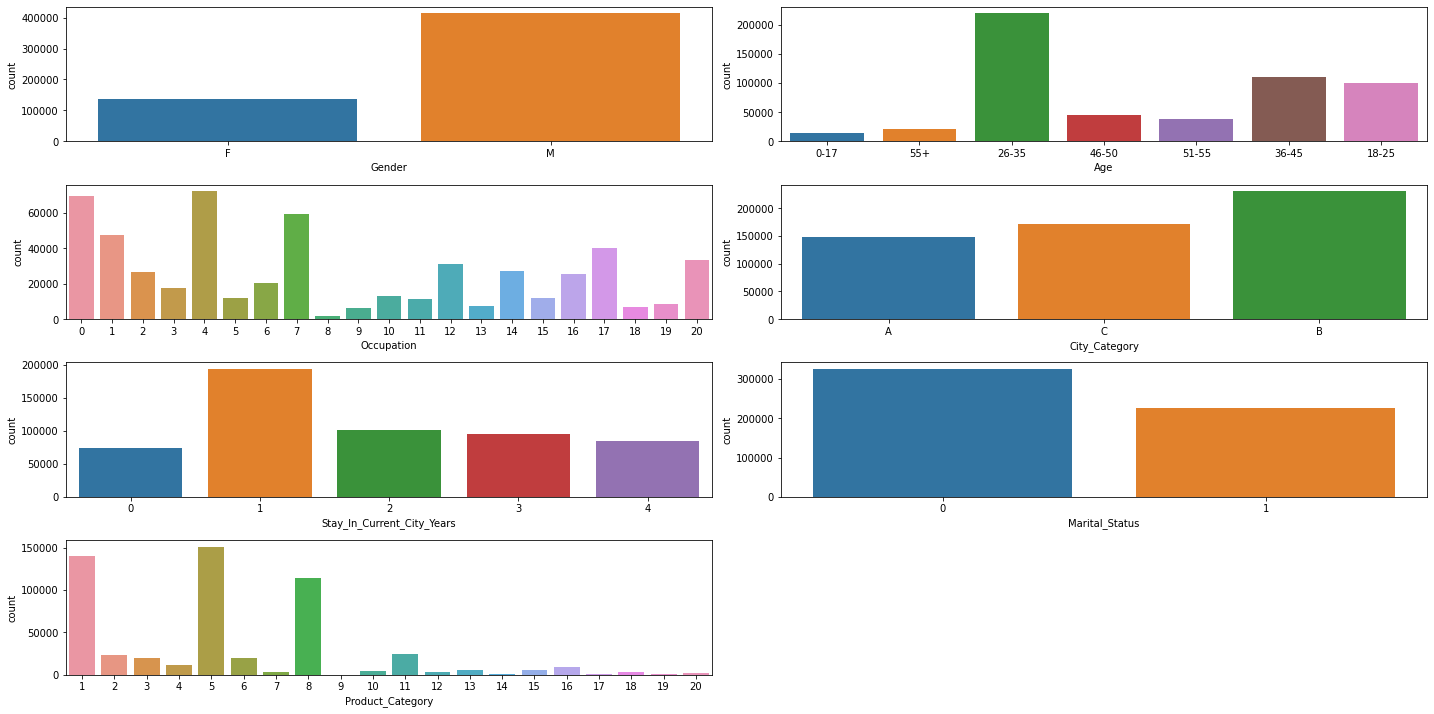

In [39]:
plt.figure(figsize=(20,10))
temp=1
for i,j in enumerate(cat_columns):
  plt.subplot(4,2,temp)
  plt.subplots_adjust(hspace = 1)
  sns.countplot(data[j])
  plt.tight_layout(pad=1)
  temp+=1

Above figure can tell us about the customers and where they belong to. most of customers are male, unmarried. they belong to age 25-35.

most of the products belong to category 1,5,8. 

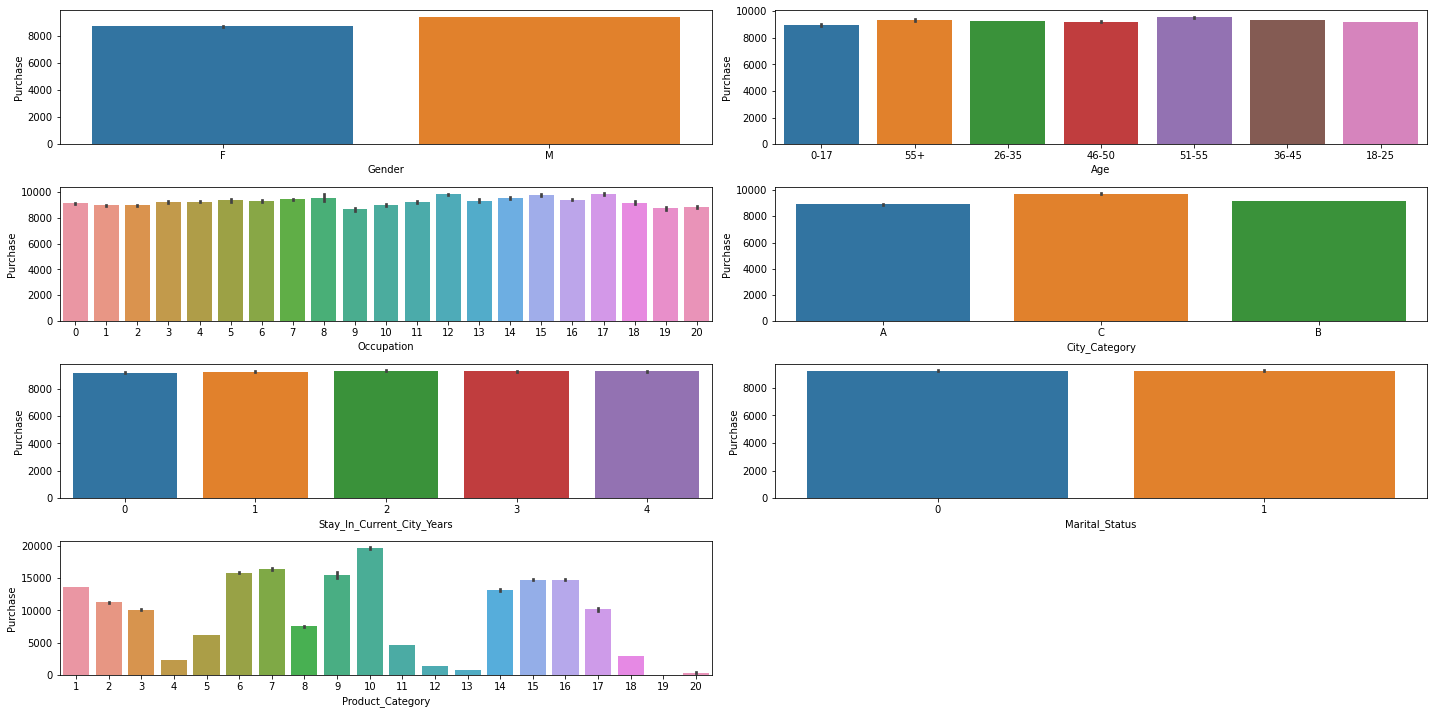

In [40]:
plt.figure(figsize=(20,10))
temp=1
for i,j in enumerate(cat_columns):
  plt.subplot(4,2,temp)
  plt.subplots_adjust(hspace = 1)
  sns.barplot(x=j,y='Purchase',data=data)
  plt.tight_layout(pad=1)
  temp+=1

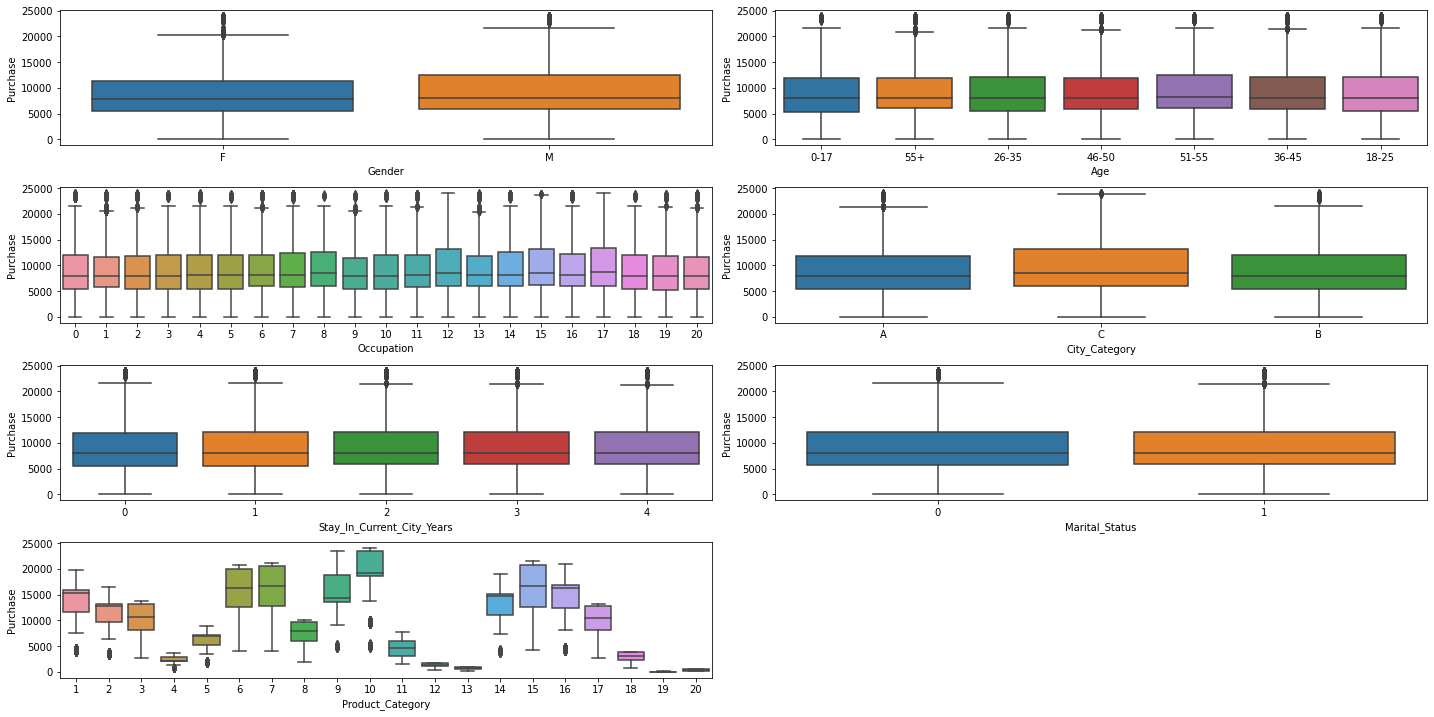

In [41]:
plt.figure(figsize=(20,10))
temp=1
for i,j in enumerate(cat_columns):
  plt.subplot(4,2,temp)
  plt.subplots_adjust(hspace = 1)
  sns.boxplot(x=j,y='Purchase',data=data)
  plt.tight_layout(pad=1)
  temp+=1

Above two figures says that amount customers are spending doesn't depends on their occupation,Age, Gender, Marital_status.

It only depends on product_category.

#Univariate analysis & Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


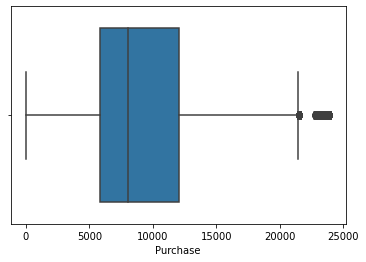

In [42]:
sns.boxplot(data['Purchase'])

In [43]:
outlier_data=data.loc[data['Purchase']>22000]
outlier_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


In [44]:
outlier_data['Product_ID'].value_counts()

P00052842    493
P00116142    330
P00085342    316
P00117642    197
P00086242    174
P00119342    151
P00159542    148
P00200642    133
P00087042    107
P00184242     75
P00202242     56
P00346542     45
P00124742     43
P00188642     27
P00273342     22
P00100142     14
P00071042      7
P00161842      4
P00031242      2
P00107342      2
P00290642      2
P00252342      1
P00306742      1
Name: Product_ID, dtype: int64

Here, few of the products are having considerable count. it may be the case that these products are costly and these are real data. so we will not drop them. 


instead we  will cap them for our analysis.

In [45]:
import numpy as np
percentile=data['Purchase'].quantile([0.01,0.99]).values
data['Purchase']=np.clip(data['Purchase'],percentile[0],percentile[1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


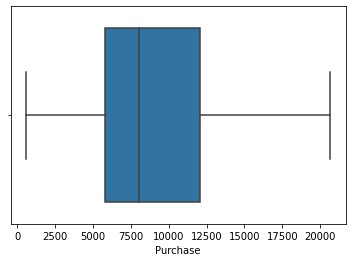

In [46]:
sns.boxplot(data['Purchase'])

In [47]:
data.drop(['User_ID','Product_ID'],axis='columns',inplace=True)

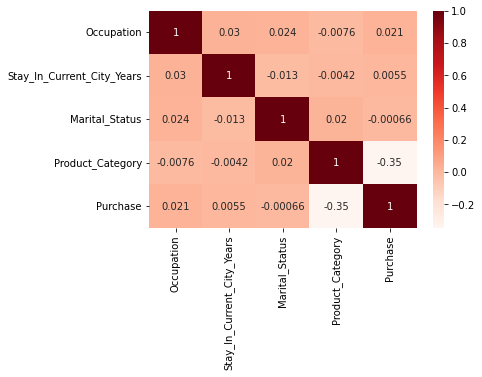

In [48]:
sns.heatmap(data.corr(),annot=True,cmap='Reds')

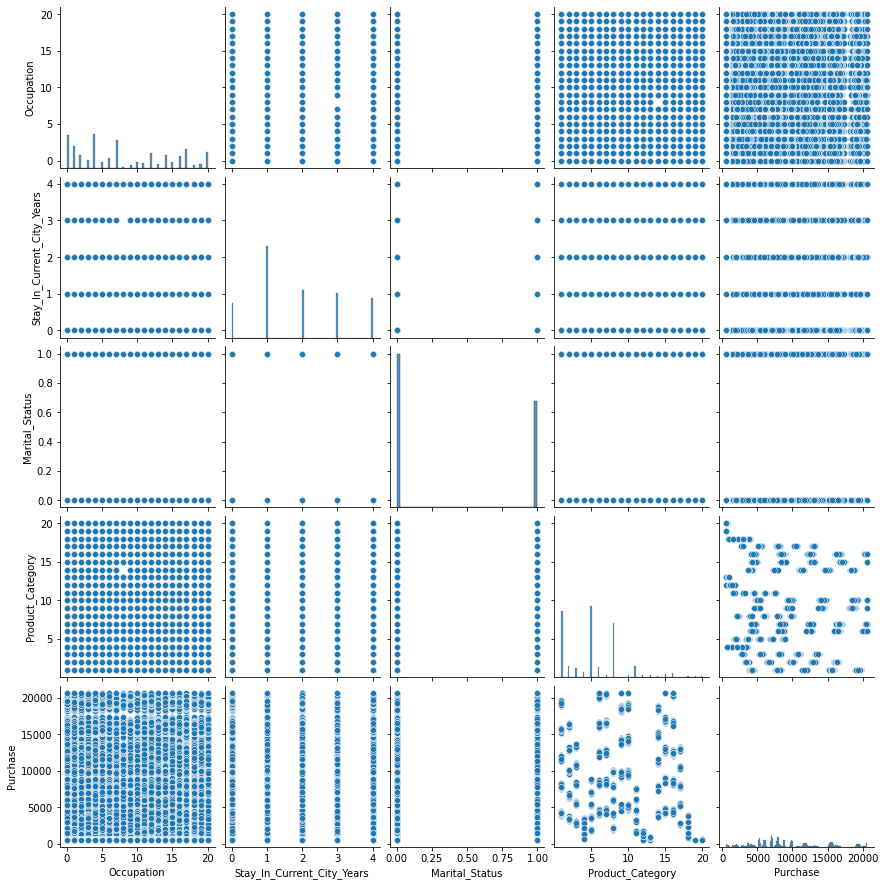

In [49]:
sns.pairplot(data)

#CLT

In [50]:
data.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8725.215214,4726.214508,587.0,5433.0,7914.0,11400.0,20665.0
M,414259.0,9426.067137,5051.899644,587.0,5863.0,8098.0,12454.0,20665.0


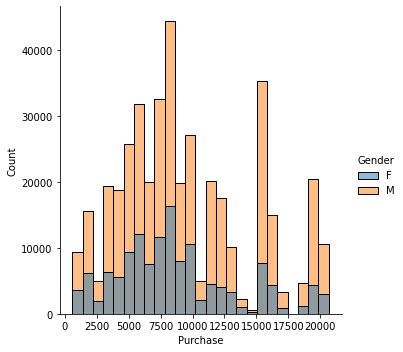

In [51]:
sns.displot( x='Purchase', data=data, hue='Gender', bins=25)

so, Here we are taking 300 random samples from the data and take its mean. we do this 1000 times.

According to CLT, it should be normally distributed.

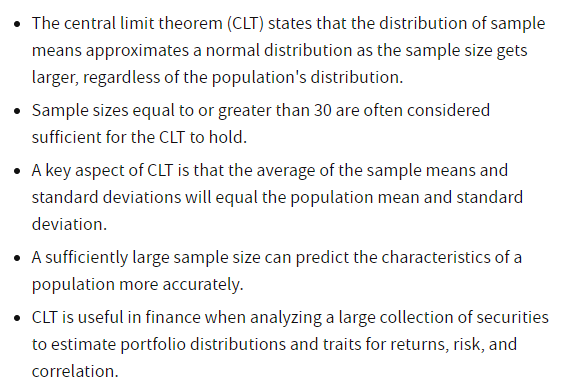

In [52]:
male_expense_mean=[data[data['Gender']=='M']['Purchase'].sample(300).mean() for i in range(1000)]

In [53]:
female_expense_mean=[data[data['Gender']=='F']['Purchase'].sample(300).mean() for i in range(1000)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


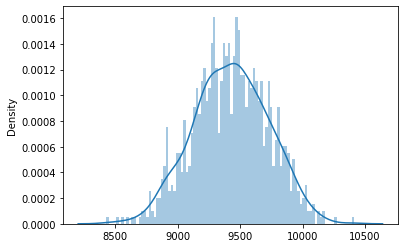

In [54]:
sns.distplot(male_expense_mean,bins=100)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


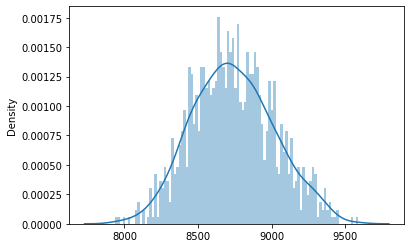

In [55]:
sns.distplot(female_expense_mean,bins=100)

As expected both are normally distributed.

In [56]:
pd.Series(male_expense_mean).mean()


9425.93283

In [57]:
import numpy as np
pd.Series(male_expense_mean).std()


300.3796076193296

In [58]:
pd.Series(female_expense_mean).mean()

8741.283023333333

In [59]:
import numpy as np
pd.Series(female_expense_mean).std()

278.8447293436857

If we compare it with above data (Data before CLT) , we will find that mean is still same but standard deviation has changed.

but we must note that, this data is about means and not the actual values. std deviation of mean has reduced,not the actual data. Mean is normally distributed and not the actual data.

Now let's apply formula to get lower & upper limits of confidence interval.

1.96 because we got it from z-table for 95% confidence.

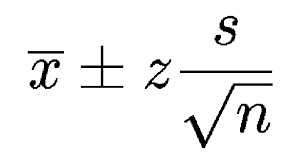

In [61]:
lower_limit_males=pd.Series(male_expense_mean).mean()-(pd.Series(male_expense_mean).std()/np.sqrt(len(male_expense_mean)))*1.96

In [66]:
upper_limit_males=pd.Series(male_expense_mean).mean()+(pd.Series(male_expense_mean).std()/np.sqrt(len(male_expense_mean)))*1.96

In [63]:
lower_limit_males,upper_limit_males

(9407.315109034203, 9444.550550965796)

In [64]:
lower_limit_females=pd.Series(female_expense_mean).mean()-(pd.Series(female_expense_mean).std()/np.sqrt(len(female_expense_mean)))*1.96

In [67]:
upper_limit_females=pd.Series(female_expense_mean).mean()+(pd.Series(female_expense_mean).std()/np.sqrt(len(female_expense_mean)))*1.96

In [68]:
lower_limit_females,upper_limit_females

(8724.000047951453, 8758.565998715214)

For both male & female mean lies in this range.

**Recemmendations**

As we saw in the data, our revenue doesn't depend much on customer identity rather in depends on product category. so we should focus more on advertising those products.

we can keep more selling products together.